# Importing Modules

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
pd.set_option('display.max_rows',150)

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

# Loading The Dataset

In [2]:
df=pd.read_csv('loan.csv')
df.head()

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Exploring Basics of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

In [6]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


CONCLUSION POINTS 1:
1. Dataset is not that big and can be prerocessed and worked upon in local system
2. Major of the customer behaviour column values are null, and thus have to be removed completely from the data for further analysis

# Data Preprocessing

In [7]:
#Dropping the columns which are completely null
df.dropna(axis=1,how='all',inplace=True)

#Checking again for null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Frome above we can see, there are 3 more columns that have high null values, they can also be dropped

In [8]:
df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
#Checking again for null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
#Listing all columns of data
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

CONCLUSION POINTS 2:
1. After removing null values the dataset is ready to be processed further
2. There were columns that were not completely null, but percentage of null values was high in them, thus they were removed

# Data Analysis

In [11]:
#Analysing the target column to understand different values
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

CONCLUSION POINTS 3:
1. From above we can clearly see that data is highly imbalanced, and would need balancing techniques to apply any model
2. The target value "Current" will have to be removed since it won't help with determining the defaulters

In [12]:
loan_status_unq = ['Fully Paid','Charged Off']
df=df[df['loan_status'].isin(loan_status_unq)]
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
#To apply any model, target column should be mapped to number, doing the same for loan_status
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [14]:
NEWAPP0=df[df.loan_status==0]    # Dataframe with all the data related to non-defaulters
NEWAPP1=df[df.loan_status==1]    # Dataframe with all the data related to defaulters

In [15]:
# function to count plot for categorical variables
def plotuninewapp(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=NEWAPP0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(NEWAPP0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=NEWAPP1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(NEWAPP1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()
    

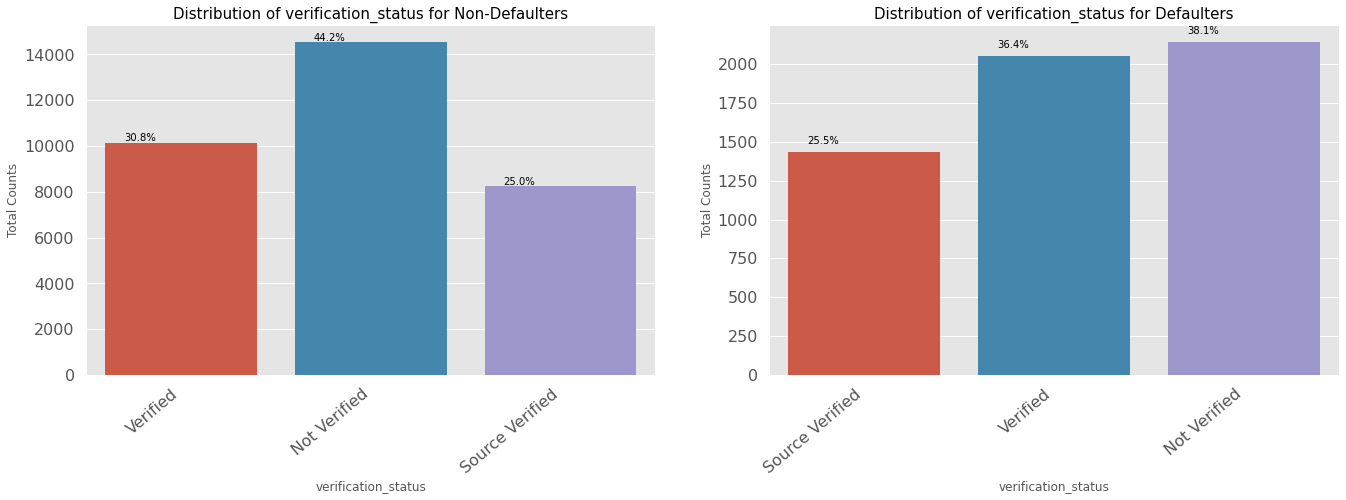

In [16]:
plotuninewapp('verification_status')

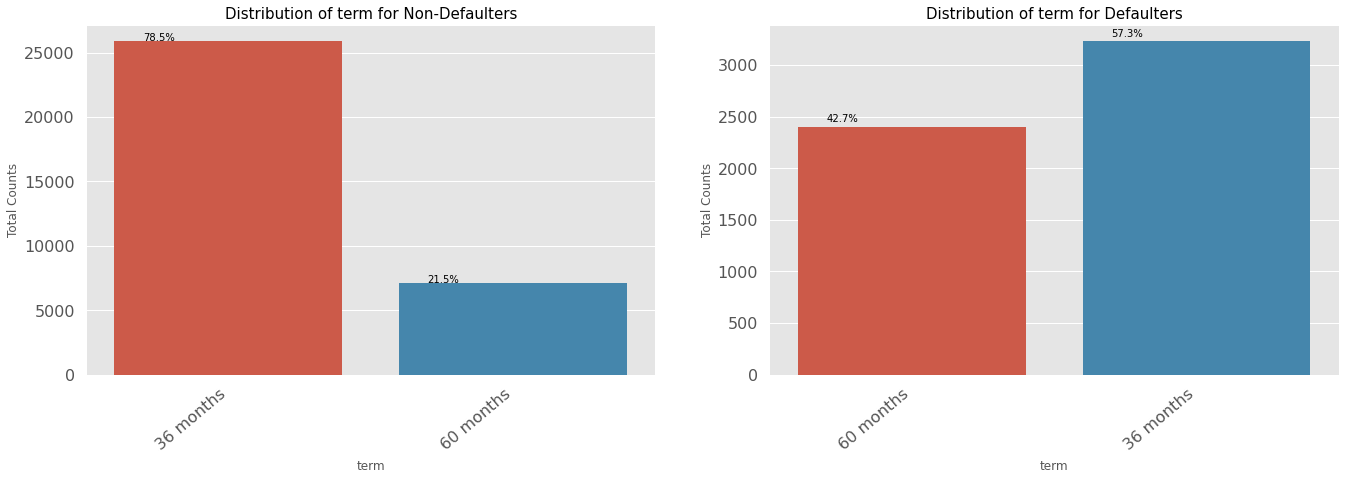

In [17]:
plotuninewapp('term')

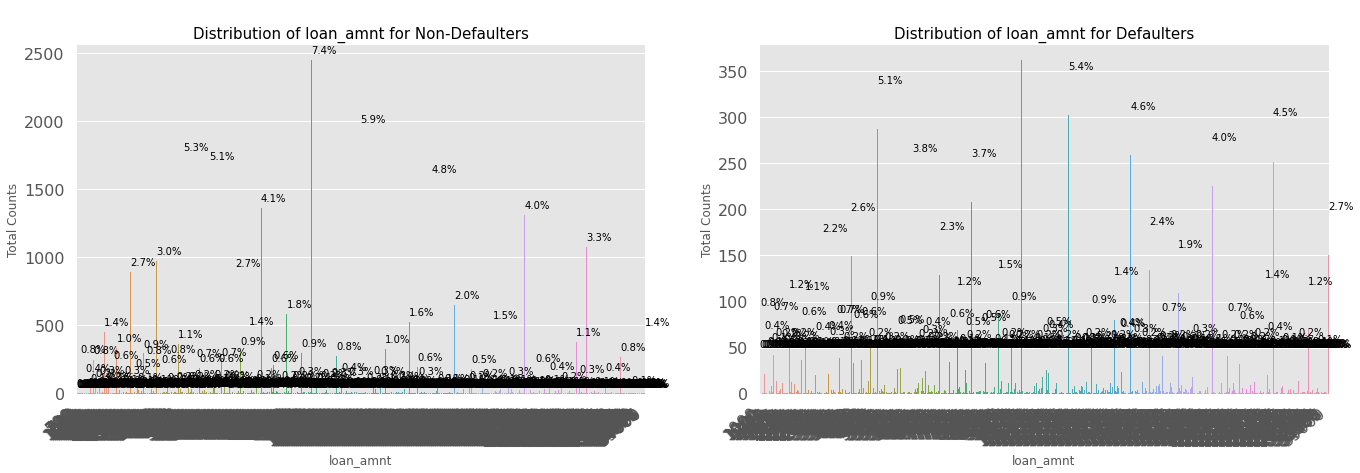

In [18]:
plotuninewapp('loan_amnt')

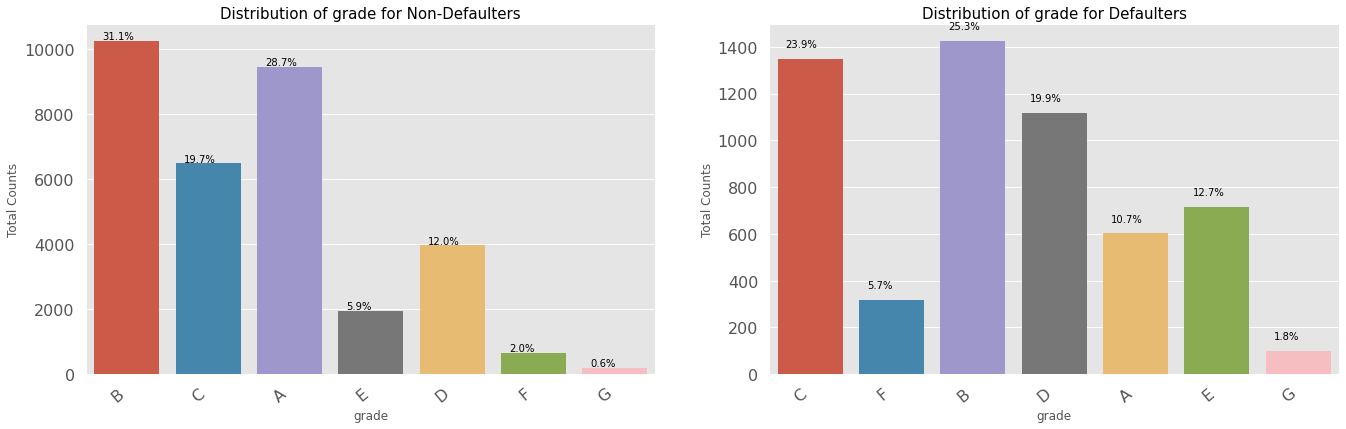

In [19]:
plotuninewapp('grade')

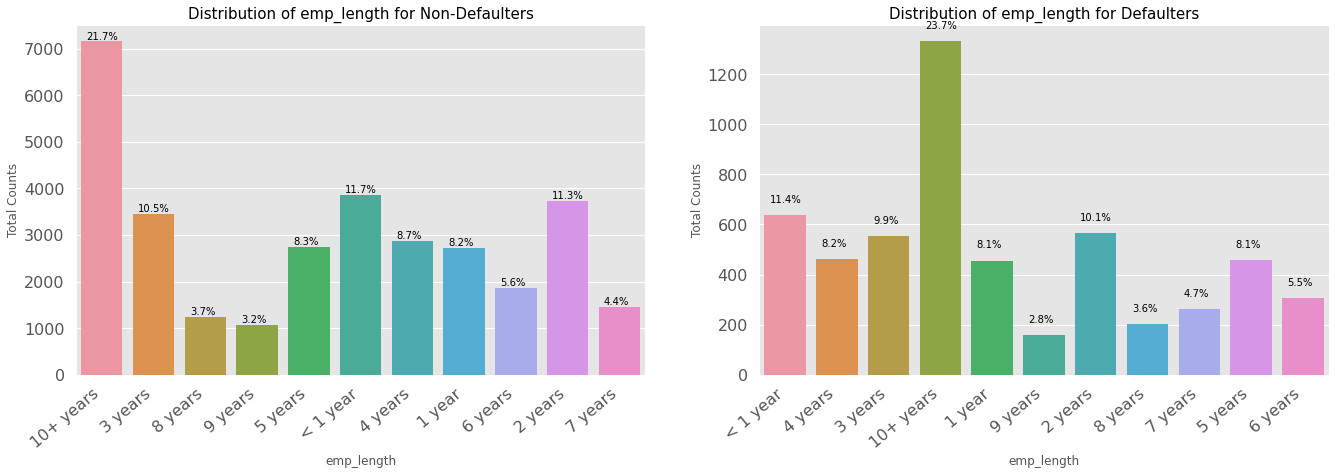

In [20]:
plotuninewapp('emp_length')

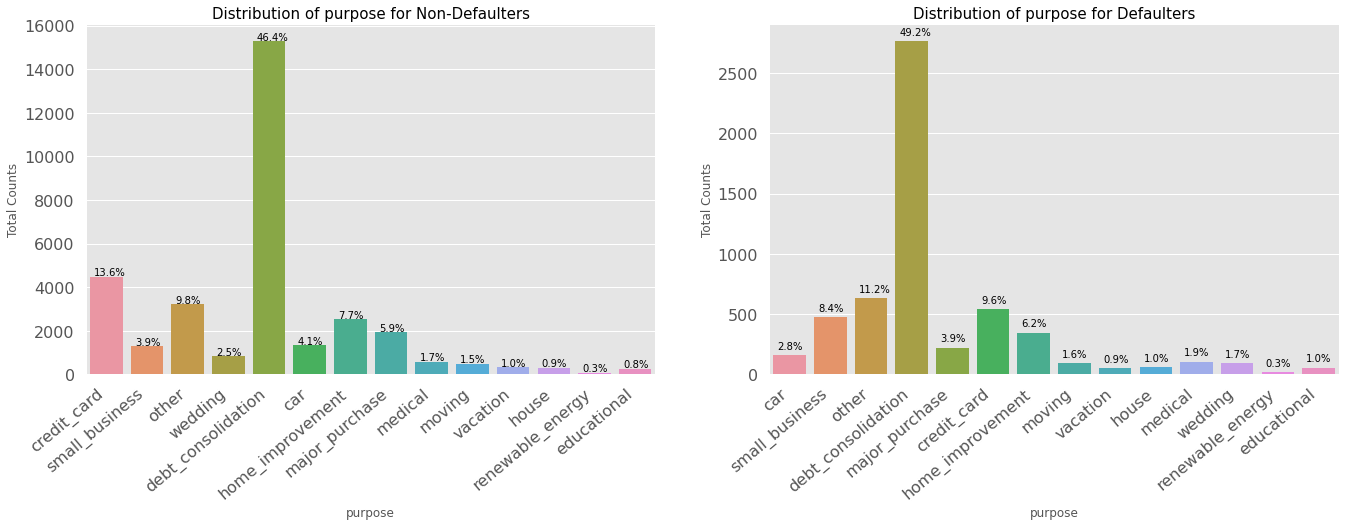

In [21]:
plotuninewapp('purpose')

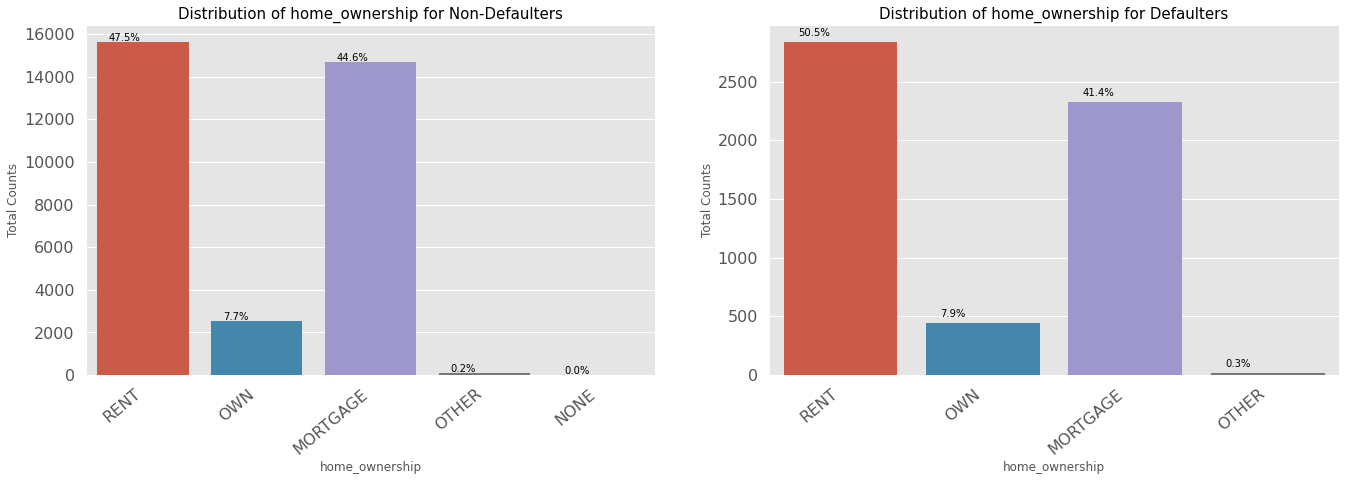

In [22]:
plotuninewapp('home_ownership')

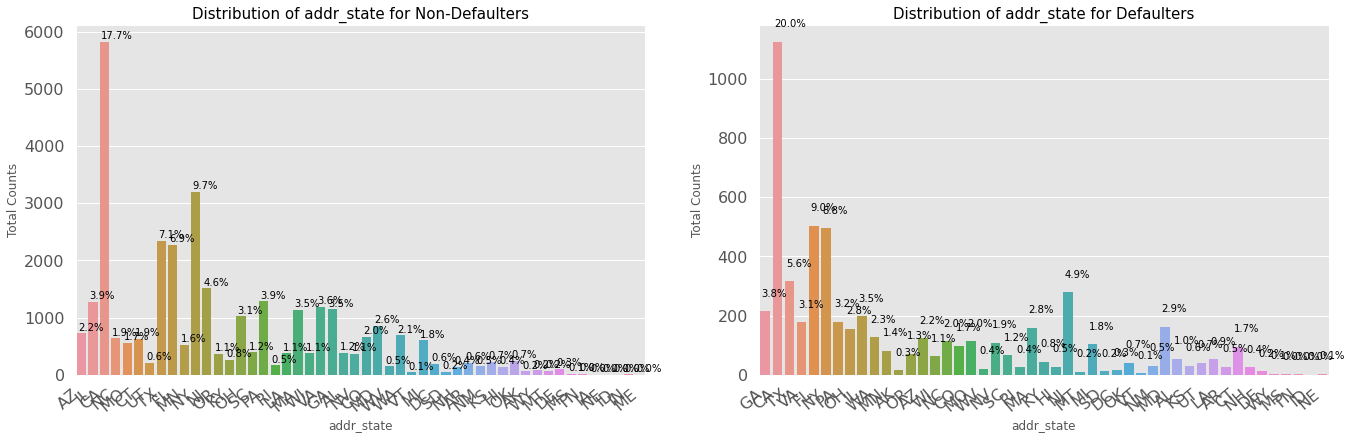

In [23]:
plotuninewapp('addr_state')

#  Univariate continuous variable analysis

In [24]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=NEWAPP0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=NEWAPP1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


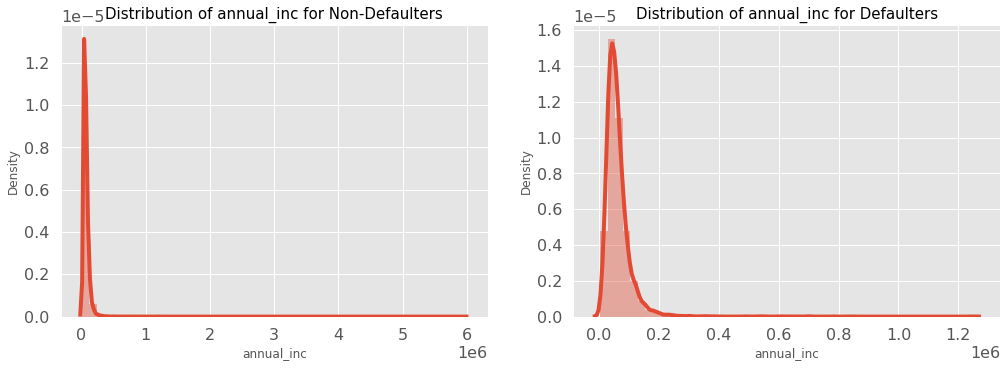

In [25]:
plotunidist('annual_inc')

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


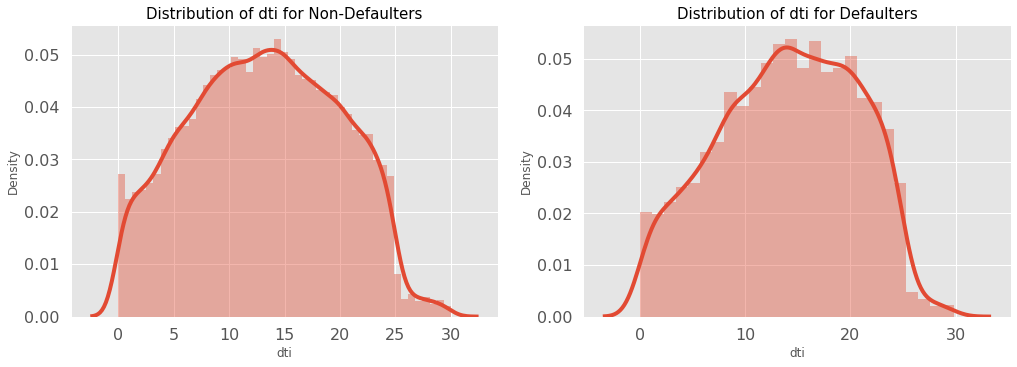

In [26]:
plotunidist('dti')

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


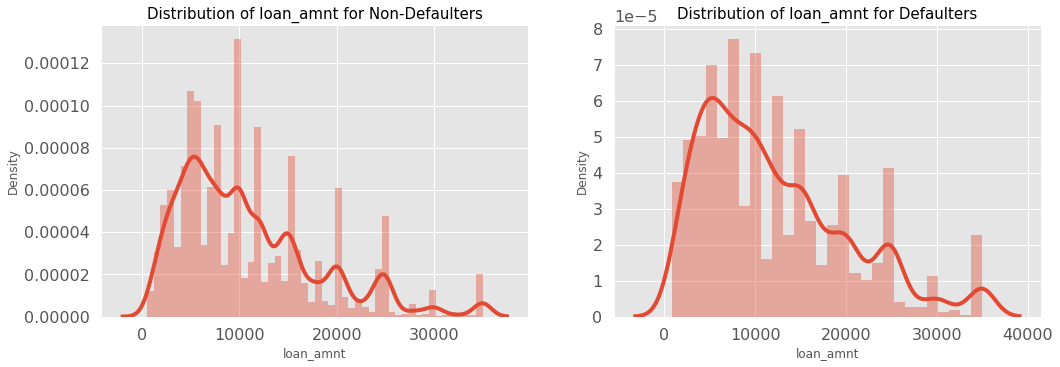

In [27]:
plotunidist('loan_amnt')

In [28]:
#Getting the top 10 correlation in NEWAPP0
corr=NEWAPP0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
611,total_rec_prncp,funded_amnt,1.000000,1.000000
32,member_id,id,0.993406,0.993406
580,total_pymnt_inv,funded_amnt_inv,0.984834,0.984834
547,total_pymnt,funded_amnt,0.983898,0.983898
625,total_rec_prncp,total_pymnt,0.983898,0.983898
98,funded_amnt,loan_amnt,0.982292,0.982292
610,total_rec_prncp,loan_amnt,0.982292,0.982292
546,total_pymnt,loan_amnt,0.968076,0.968076
593,total_pymnt_inv,total_pymnt,0.966640,0.966640
131,funded_amnt_inv,funded_amnt,0.962434,0.962434


In [29]:
#Getting the top 10 correlation NEWAPP1
corr=NEWAPP1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
32,member_id,id,0.994192,0.994192
98,funded_amnt,loan_amnt,0.979134,0.979134
593,total_pymnt_inv,total_pymnt,0.968039,0.968039
163,installment,funded_amnt,0.953826,0.953826
131,funded_amnt_inv,funded_amnt,0.926996,0.926996
162,installment,loan_amnt,0.925911,0.925911
625,total_rec_prncp,total_pymnt,0.914954,0.914954
130,funded_amnt_inv,loan_amnt,0.907129,0.907129
657,total_rec_int,total_pymnt,0.896605,0.896605
658,total_rec_int,total_pymnt_inv,0.885648,0.885648


# Bivariate Analysis of numeric columns


In [30]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=NEWAPP0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=NEWAPP1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

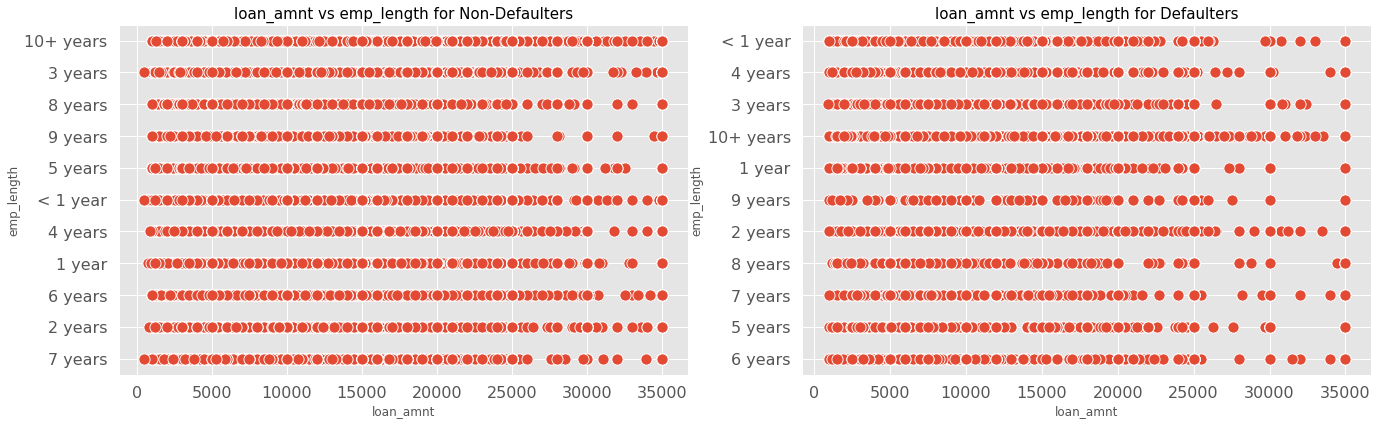

In [31]:
plotbivar('loan_amnt','emp_length')

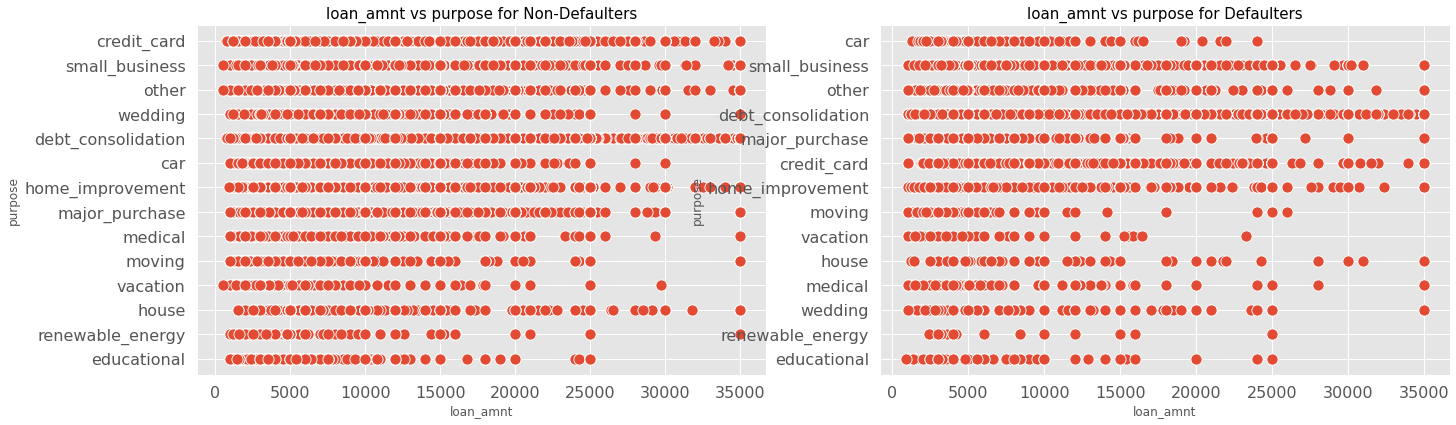

In [32]:
plotbivar('loan_amnt','purpose')

C:\Users\pg21p\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

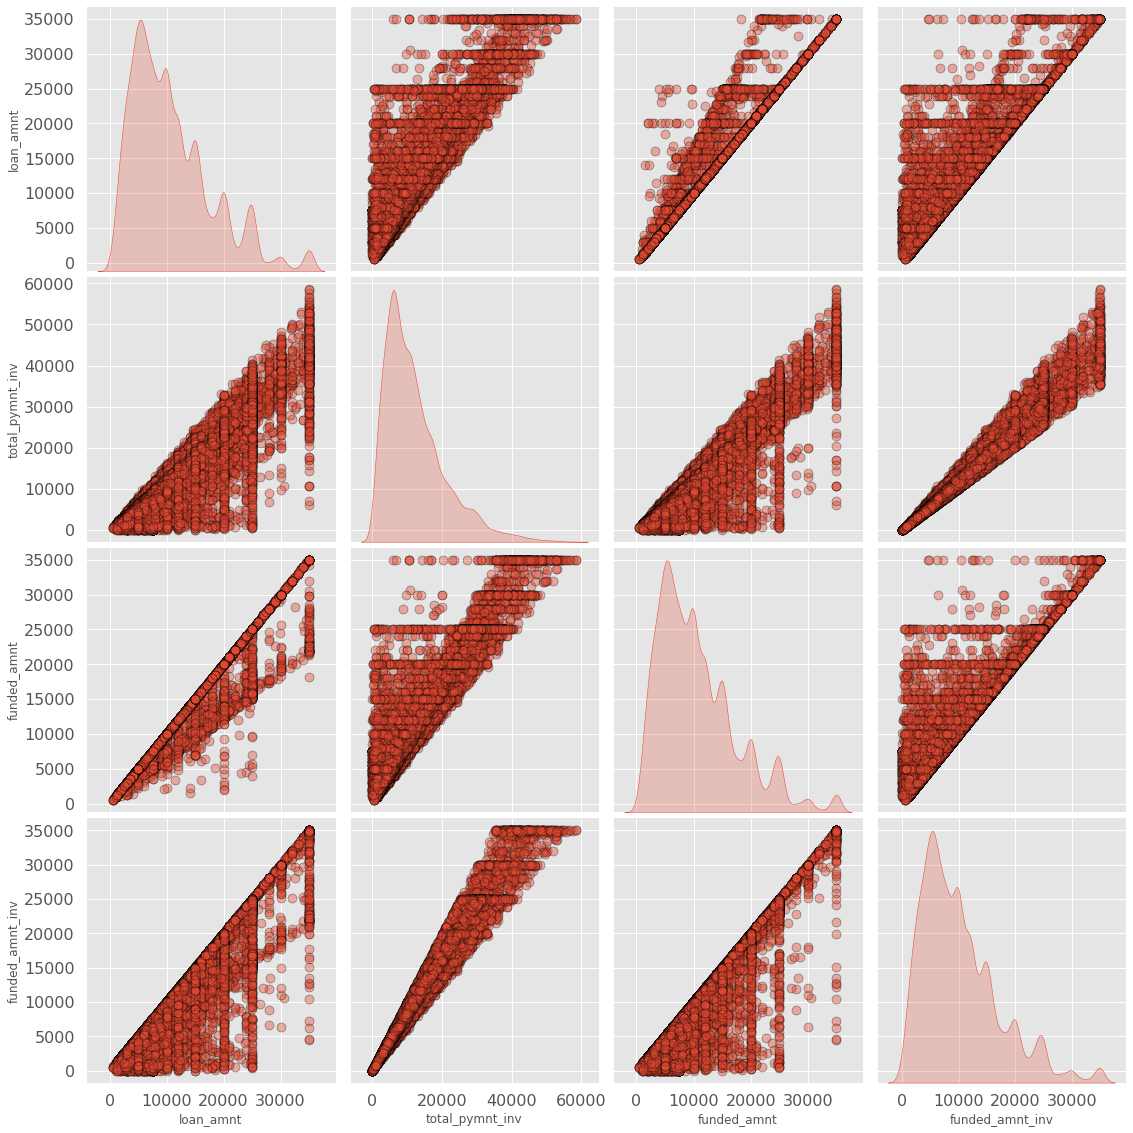

In [33]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(NEWAPP0[['loan_amnt','total_pymnt_inv','funded_amnt','funded_amnt_inv','emp_length']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()